# Project
The energy companies are always facing the challenge of producing more accurate load forecasts. Many
factors have been studied to perform short-term, mid-term, and long-term trends forecast. For example,
GDP could be useful to forecast long term electricity consumption trends while holiday schedule and weather
conditions have direct impact to short term forecast. In the past two years, city lockdown due to COVID’19
pandemics has significant impact to electricity consumption. The hourly electricity consumption records in
the Tokyo area from 2016 to current are available in [1].
This dataset includes three columns: date, hour, and amount, as shown in Figure 1. The electricity
consumption is measured is by Megawatt.

Date, Time, Amount(10MW)  
2019/01/01, 00:00, 3017  

In this test, we ask forecast for hourly electricity consumption on the following four dates:
- January 1, 2021 (new year holiday in Japan)
- February 1, 2021 (Monday)
- March 20, 2021 (Peak of Cherry Blossom in Tokyo)
- July 23, 2021 (Opening day of 2020 Olympic game in Tokyo)
- July 26, 2021 (Forth day of 2020 Olympic game in Tokyo)

Additional data should not be limited to the information mentioned above. Depending on your hypotheses
and special events, features used for the forecast are flexible and could vary greatly. Do not limit your
imagination. Reference [2] helps ease the difficulties of implementation for crawling services. Some data,
such as holiday schedule and weather data in Tokyo from 2016 to current has been downloaded and provided
in [3].

References
- [1] https://www.tepco.co.jp/en/forecast/html/download-e.html  
- [2] https://github.com/alexbui91/Air-Quality-Prediction-Datasets  
- [3] https://drive.google.com/drive/folders/1ogzS9LIPg5X2covvORmDiBnzupj7ZmhB?usp=sharing  




# 1. Introduction: EDA
In this notebook, we will perform data preprocessing and exploratory data analysis.

In [1]:
# imort required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data

## 2.1 Load hourly electricity consumption data

In [2]:
ec_2016 = pd.read_csv('./data/electricity_2016.csv', parse_dates=[['DATE', 'TIME']])
ec_2017 = pd.read_csv('./data/electricity_2017.csv', parse_dates=[['DATE', 'TIME']])
ec_2018 = pd.read_csv('./data/electricity_2018.csv', parse_dates=[['DATE', 'TIME']])
ec_2019 = pd.read_csv('./data/electricity_2019.csv', parse_dates=[['DATE', 'TIME']])
ec_2020 = pd.read_csv('./data/electricity_2020.csv', parse_dates=[['DATE', 'TIME']])
ec_2021 = pd.read_csv('./data/electricity_2021.csv', parse_dates=[['DATE', 'TIME']])

ec_list = [ec_2016, ec_2017, ec_2018, ec_2019, ec_2020, ec_2021]

In [3]:
ec_concat = pd.concat(ec_list)

In [4]:
ec_concat.head()

,DATE_TIME,kW
0,2016-04-01 00:00:00,2555
1,2016-04-01 01:00:00,2433
2,2016-04-01 02:00:00,2393
3,2016-04-01 03:00:00,2375
4,2016-04-01 04:00:00,2390


In [5]:
ec_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48072 entries, 0 to 6407
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE_TIME  48072 non-null  datetime64[ns]
 1   kW         48072 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 MB


In [6]:
ec_concat.describe()

,kW
count,48072.000000
mean,3236.146863
std,658.117814
min,1877.000000
25%,2715.000000
50%,3186.000000
75%,3656.000000
max,5665.000000


In [7]:
ec_concat.rename(columns={'DATE_TIME': 'Dates', 'kW':'mW'}, inplace=True)

In [8]:
ec_concat

,Dates,mW
0,2016-04-01 00:00:00,2555
1,2016-04-01 01:00:00,2433
2,2016-04-01 02:00:00,2393
3,2016-04-01 03:00:00,2375
4,2016-04-01 04:00:00,2390
...,...,...
6403,2021-09-24 19:00:00,3592
6404,2021-09-24 20:00:00,3341
6405,2021-09-24 21:00:00,3123
6406,2021-09-24 22:00:00,2999


## 2.2 Add datetime information

In [9]:
def season_calc(month):
    if month in [12, 1, 2]:
        return "winter"
    elif month in [3, 4, 5]:
        return "spring"
    elif month in [6, 7, 8]:
        return "summer"
    else:
        return "autumn"

In [10]:
weekdays = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3: 'Thursday', 4: 'Friday', 5:'Saturday', 6:'Sunday'}
ec_concat['year'] = ec_concat.Dates.dt.year
ec_concat['month'] = ec_concat.Dates.dt.month
ec_concat['day'] = ec_concat.Dates.dt.day
ec_concat['hour'] = ec_concat.Dates.dt.hour
ec_concat['weekday'] = ec_concat.Dates.dt.weekday.map(weekdays)
ec_concat['season'] = ec_concat.Dates.dt.month.apply(season_calc)

In [11]:
ec_concat

,Dates,mW,year,month,day,hour,weekday,season
0,2016-04-01 00:00:00,2555,2016,4,1,0,Friday,spring
1,2016-04-01 01:00:00,2433,2016,4,1,1,Friday,spring
2,2016-04-01 02:00:00,2393,2016,4,1,2,Friday,spring
3,2016-04-01 03:00:00,2375,2016,4,1,3,Friday,spring
4,2016-04-01 04:00:00,2390,2016,4,1,4,Friday,spring
...,...,...,...,...,...,...,...,...
6403,2021-09-24 19:00:00,3592,2021,9,24,19,Friday,autumn
6404,2021-09-24 20:00:00,3341,2021,9,24,20,Friday,autumn
6405,2021-09-24 21:00:00,3123,2021,9,24,21,Friday,autumn
6406,2021-09-24 22:00:00,2999,2021,9,24,22,Friday,autumn


## 2.3 Load holiday data and add
We give 1 for day that is holiday, and 0 for day that is not.

In [12]:
holiday_df = pd.read_csv('./data/holiday_japan_2016_2021.csv')

In [13]:
holiday_date = pd.to_datetime(holiday_df['Date'])

In [14]:
holiday_date

0     2016-01-01
1     2016-01-02
2     2016-01-03
3     2016-01-11
4     2016-02-11
         ...    
190   2021-11-15
191   2021-11-23
192   2021-12-22
193   2021-12-25
194   2021-12-31
Name: Date, Length: 195, dtype: datetime64[ns]

In [15]:
ec_concat['holiday'] = ec_concat['Dates'].isin(holiday_date)

In [16]:
mapped = {True:1, False:0}
ec_concat.holiday = ec_concat.holiday.map(mapped)
ec_concat.head()

,Dates,mW,year,month,day,hour,weekday,season,holiday
0,2016-04-01 00:00:00,2555,2016,4,1,0,Friday,spring,0
1,2016-04-01 01:00:00,2433,2016,4,1,1,Friday,spring,0
2,2016-04-01 02:00:00,2393,2016,4,1,2,Friday,spring,0
3,2016-04-01 03:00:00,2375,2016,4,1,3,Friday,spring,0
4,2016-04-01 04:00:00,2390,2016,4,1,4,Friday,spring,0


Add non-working column to indicate non working days

In [17]:
ec_concat['non_working'] = ec_concat.apply(lambda x: 'non-working' if \
                                         ((x['holiday'] == 1) or (x['weekday'] in ['Saturday', 'Sunday']))
                                         else 'working', axis = 1)

In [18]:
ec_concat

,Dates,mW,year,month,day,hour,weekday,season,holiday,non_working
0,2016-04-01 00:00:00,2555,2016,4,1,0,Friday,spring,0,working
1,2016-04-01 01:00:00,2433,2016,4,1,1,Friday,spring,0,working
2,2016-04-01 02:00:00,2393,2016,4,1,2,Friday,spring,0,working
3,2016-04-01 03:00:00,2375,2016,4,1,3,Friday,spring,0,working
4,2016-04-01 04:00:00,2390,2016,4,1,4,Friday,spring,0,working
...,...,...,...,...,...,...,...,...,...,...
6403,2021-09-24 19:00:00,3592,2021,9,24,19,Friday,autumn,0,working
6404,2021-09-24 20:00:00,3341,2021,9,24,20,Friday,autumn,0,working
6405,2021-09-24 21:00:00,3123,2021,9,24,21,Friday,autumn,0,working
6406,2021-09-24 22:00:00,2999,2021,9,24,22,Friday,autumn,0,working


In [19]:
ec_concat['Dates'] = pd.to_datetime(ec_concat['Dates'])

In [20]:
ec_concat.set_index('Dates', inplace=True)

In [21]:
ec_concat

,mW,year,month,day,hour,weekday,season,holiday,non_working
Dates,,,,,,,,,
2016-04-01 00:00:00,2555,2016,4,1,0,Friday,spring,0,working
2016-04-01 01:00:00,2433,2016,4,1,1,Friday,spring,0,working
2016-04-01 02:00:00,2393,2016,4,1,2,Friday,spring,0,working
2016-04-01 03:00:00,2375,2016,4,1,3,Friday,spring,0,working
2016-04-01 04:00:00,2390,2016,4,1,4,Friday,spring,0,working
...,...,...,...,...,...,...,...,...,...
2021-09-24 19:00:00,3592,2021,9,24,19,Friday,autumn,0,working
2021-09-24 20:00:00,3341,2021,9,24,20,Friday,autumn,0,working
2021-09-24 21:00:00,3123,2021,9,24,21,Friday,autumn,0,working


## 2.4 Load weather data and add

In [22]:
weather_2016 = pd.read_csv("./data/weather_tokyo_2016.csv")
weather_2017 = pd.read_csv("./data/weather_tokyo_2017.csv")
weather_2018 = pd.read_csv("./data/weather_tokyo_2018.csv")
weather_2019 = pd.read_csv("./data/weather_tokyo_2019.csv")
weather_2020 = pd.read_csv("./data/weather_tokyo_2020.csv")
weather_2021 = pd.read_csv("./data/weather_tokyo_2021.csv")

weather_list = [weather_2016, weather_2017, weather_2018, weather_2019, weather_2020, weather_2021]

In [23]:
weather_concat = pd.concat(weather_list)

In [24]:
weather_concat['datetime'] = pd.to_datetime(weather_concat['datetime'])

In [25]:
weather_concat.set_index('datetime', inplace=True)

In [26]:
weather_concat

,temp(F),feels_like(F),dew_point(F),wind_speed(mph),wind_dir(deg),wind_dir(dir),uv_index,precip(inch),precip_hourly(inch),pressure(inch),humidity(%),overall
datetime,,,,,,,,,,,,
2016-01-01 00:00:00,46,41,37,10,20,NNE,0,0,0,30.12,71,Fair
2016-01-01 00:30:00,46,41,37,12,20,NNE,0,0,0,30.09,71,Fair
2016-01-01 01:00:00,46,41,37,13,20,NNE,0,0,0,30.12,71,Fair
2016-01-01 01:30:00,45,38,37,14,360,N,0,0,0,30.12,76,Fair
2016-01-01 02:00:00,45,38,36,13,360,N,0,0,0,30.12,71,Partly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31 22:00:00,75,75,70,13,40,NE,0,0,0,29.92,83,Light Rain with Thunder
2021-08-31 22:20:00,75,75,70,12,30,NNE,0,0,0,29.92,83,Showers in the Vicinity
2021-08-31 22:30:00,75,75,70,10,20,NNE,0,0,0,29.92,83,Light Rain Shower


In [27]:
ec_concat = ec_concat.join(weather_concat, lsuffix='_caller', rsuffix='_other')

In [28]:
ec_concat.dropna(inplace=True)

In [29]:
ec_concat

,mW,year,month,day,hour,weekday,season,holiday,non_working,temp(F),...,dew_point(F),wind_speed(mph),wind_dir(deg),wind_dir(dir),uv_index,precip(inch),precip_hourly(inch),pressure(inch),humidity(%),overall
Dates,,,,,,,,,,,,,,,,,,,,,
2016-04-01 00:00:00,2555,2016,4,1,0,Friday,spring,0,working,57.0,...,52.0,3.0,130,SE,0.0,0.0,0.0,30.00,82.0,Mostly Cloudy
2016-04-01 01:00:00,2433,2016,4,1,1,Friday,spring,0,working,57.0,...,54.0,5.0,70,ENE,0.0,0.0,0.0,30.00,88.0,Mostly Cloudy
2016-04-01 02:00:00,2393,2016,4,1,2,Friday,spring,0,working,55.0,...,50.0,5.0,30,NNE,0.0,0.0,0.0,30.00,82.0,Mostly Cloudy
2016-04-01 03:00:00,2375,2016,4,1,3,Friday,spring,0,working,55.0,...,50.0,3.0,350,N,0.0,0.0,0.0,30.00,82.0,Partly Cloudy
2016-04-01 04:00:00,2390,2016,4,1,4,Friday,spring,0,working,57.0,...,48.0,7.0,350,N,0.0,0.0,0.0,30.00,72.0,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31 19:00:00,3970,2021,8,31,19,Tuesday,summer,0,working,82.0,...,70.0,9.0,120,ESE,0.0,0.0,0.0,29.89,66.0,Showers in the Vicinity
2021-08-31 20:00:00,3672,2021,8,31,20,Tuesday,summer,0,working,82.0,...,68.0,10.0,70,ENE,0.0,0.0,0.0,29.92,62.0,Light Rain
2021-08-31 21:00:00,3396,2021,8,31,21,Tuesday,summer,0,working,75.0,...,72.0,18.0,30,NNE,0.0,0.0,0.0,29.92,89.0,Light Rain


# 3. Data Exploration

## 3.1 Plot data by hour, day, month, year

In [30]:
ec_concat_year = ec_concat.groupby(pd.Grouper(freq='Y')).mean()
ec_concat_month = ec_concat.groupby(pd.Grouper(freq='M')).mean()
ec_concat_day = ec_concat.groupby(pd.Grouper(freq='D')).mean()

<AxesSubplot:title={'center':'mW by hour (mWH)'}, xlabel='Dates'>

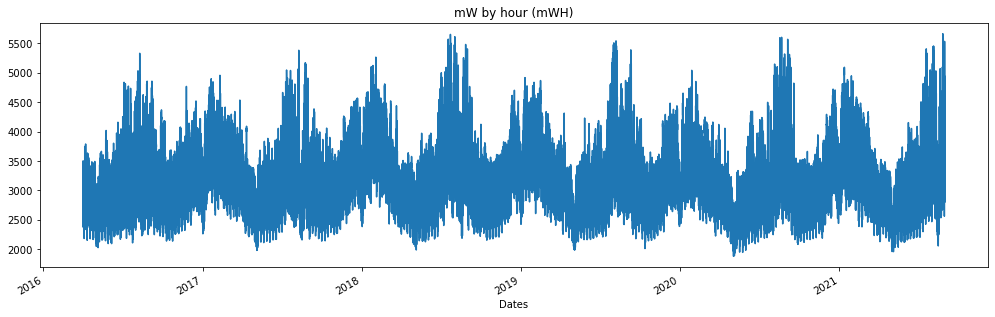

In [31]:
ec_concat['mW'].plot(figsize=(17, 5), title='mW by hour (mWH)')

<AxesSubplot:title={'center':'Mean mW by day'}, xlabel='Dates'>

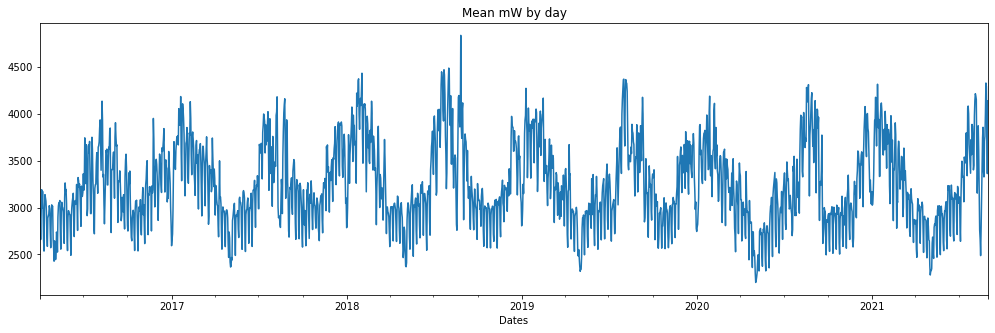

In [32]:
ec_concat_day['mW'].plot(figsize=(17, 5), title='Mean mW by day')

<AxesSubplot:title={'center':'Mean mW by month'}, xlabel='Dates'>

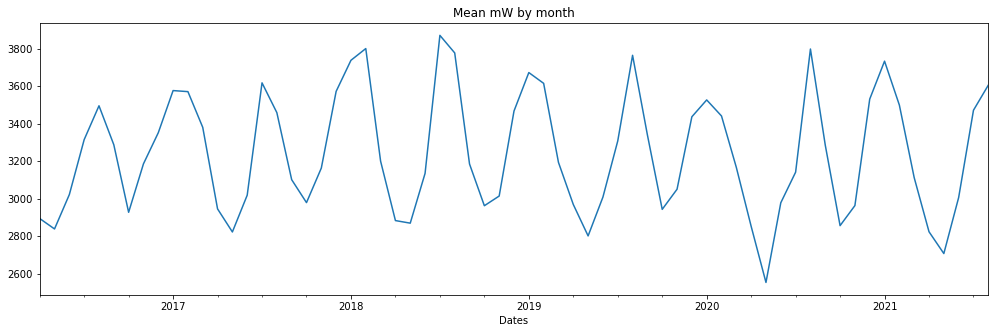

In [33]:
ec_concat_month['mW'].plot(figsize=(17, 5), title='Mean mW by month')

Potential cycles, patterns are shown.

<AxesSubplot:title={'center':'Mean mW by year'}, xlabel='Dates'>

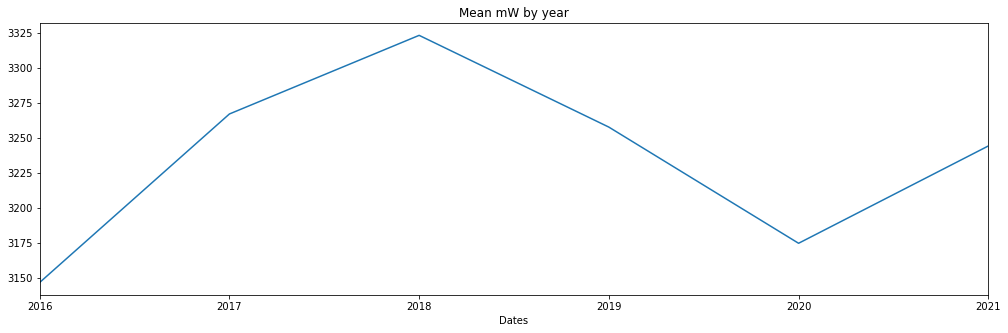

In [34]:
ec_concat_year['mW'].plot(figsize=(17, 5), title='Mean mW by year')

Consumption was increasing then dropped at 2020.

## 3.2. Average hourly, monthly

<AxesSubplot:title={'center':'Mean mW every hour in 2016-2021'}, xlabel='hour'>

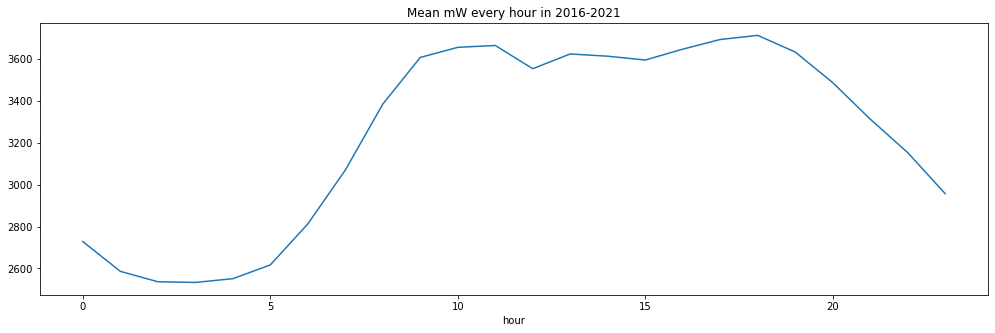

In [35]:
ec_concat.groupby('hour')['mW'].mean().plot(figsize=(17, 5), title='Mean mW every hour in 2016-2021')

Usage drops during night and rises during the day.

<AxesSubplot:xlabel='month'>

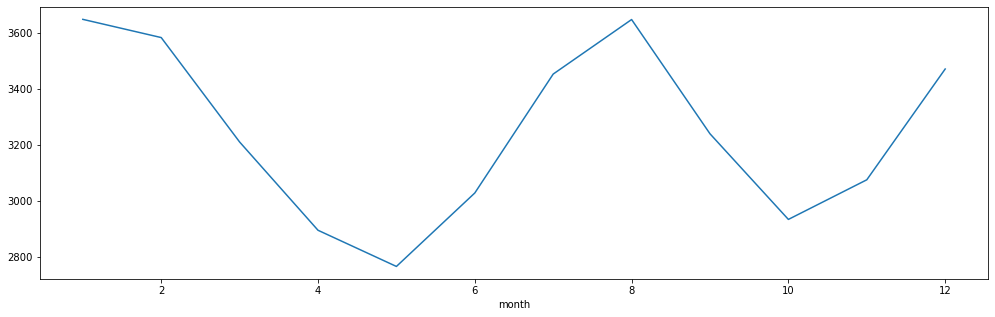

In [36]:
ec_concat.groupby('month')['mW'].mean().plot(figsize=(17, 5))

As expected the monthly load profile peaks in the summer and winter due to high cooling (air-conditioning) and heating load caused by extreme temperatures.

## 3.3 Affect of day of the week

In [37]:
hour_weekday = ec_concat.pivot_table(values='mW', index='hour', columns = 'weekday', aggfunc = 'mean')

Text(0.5, 1.0, 'Average energy consumption in mWH for each hour of each weekday averaged over 5 years')

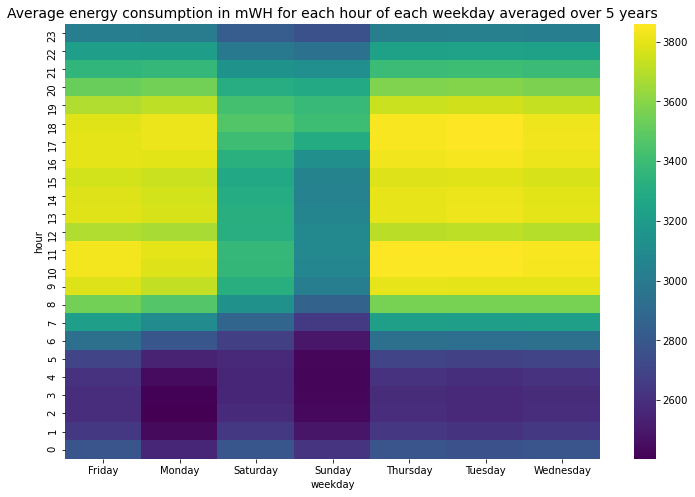

In [38]:
#plotting a heatmap with a colorbar; the colorbar shows the energy consumption in MWH
plt.figure(figsize=(12, 8))
ax = sns.heatmap(hour_weekday.sort_index(ascending = False), cmap='viridis')
ax.set_title("Average energy consumption in mWH for each hour of each weekday averaged over 5 years", fontsize = 14)

More energy was spent on weekdays, and less on weekends.

Text(0.5, 1.0, 'Boxplot of average mWH when weekday is working or non-working ')

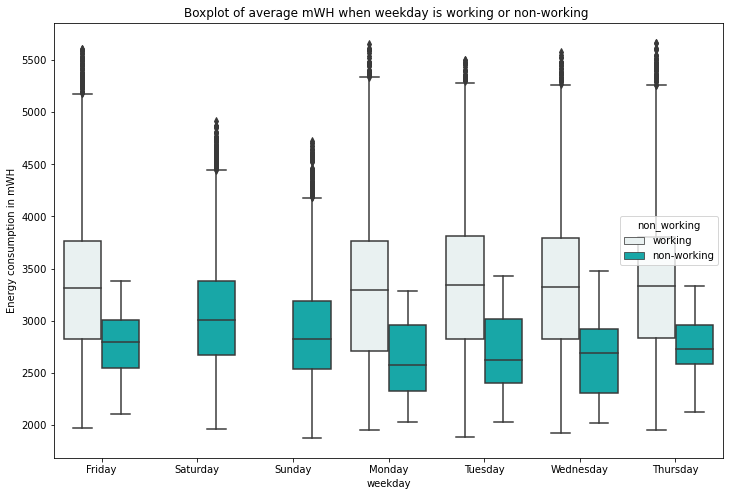

In [39]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'weekday', y = 'mW', data = ec_concat, color='c', hue='non_working')
plt.ylabel('Energy consumption in mWH')
plt.title('Boxplot of average mWH when weekday is working or non-working ')

Non working days show less consumption.

## 3.4 Energy consumption distribution

/home/kihongseong/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

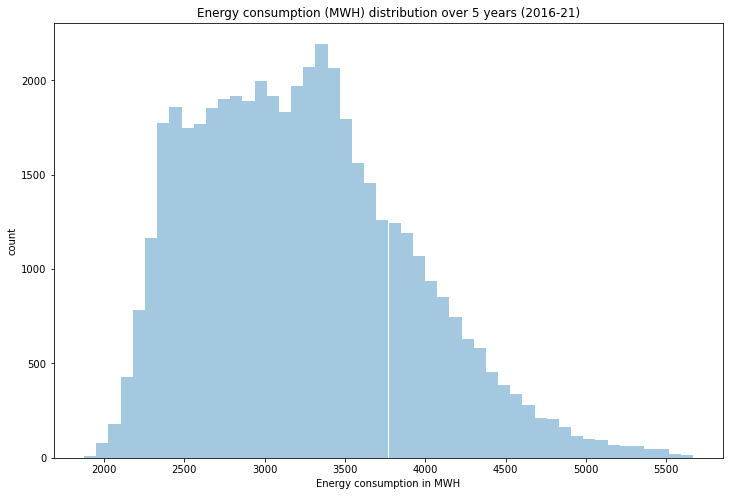

In [40]:
plt.figure(figsize = (12,8))
sns.distplot(ec_concat['mW'], kde=False)
plt.title('Energy consumption (MWH) distribution over 5 years (2016-21)')
plt.xlabel('Energy consumption in MWH')
plt.ylabel('count')

## 3.5 Variation in years

Text(0.5, 1.0, 'Variation in Distribution of Energy consumption over 5 years (2016-21)')

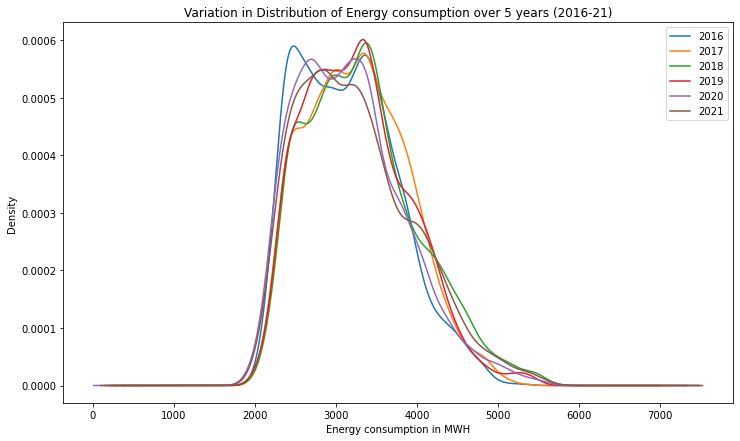

In [41]:
for year in ec_concat['year'].unique():
    ec_concat[ec_concat['year'] == year]['mW'].plot(kind='density', figsize = (12,7), legend = True, label = year)
plt.xlabel('Energy consumption in MWH')
plt.title('Variation in Distribution of Energy consumption over 5 years (2016-21)')

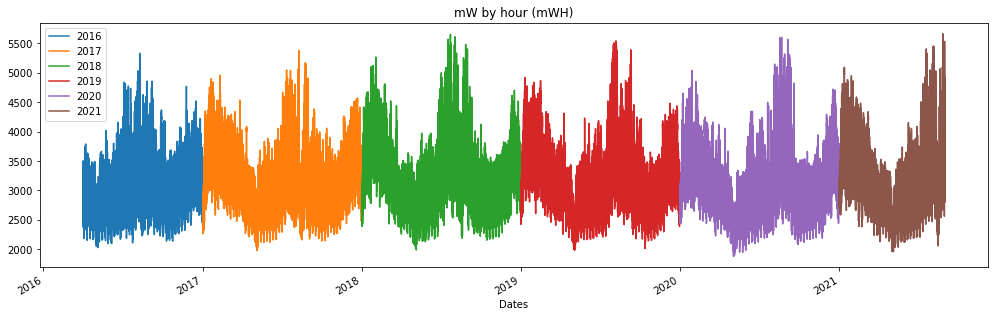

In [42]:
for year in ec_concat['year'].unique():
    ec_concat[ec_concat['year'] == year]['mW'].plot(figsize=(17, 5), legend=True, label=year, title='mW by hour (mWH)')

## 3.6 Vs. weather

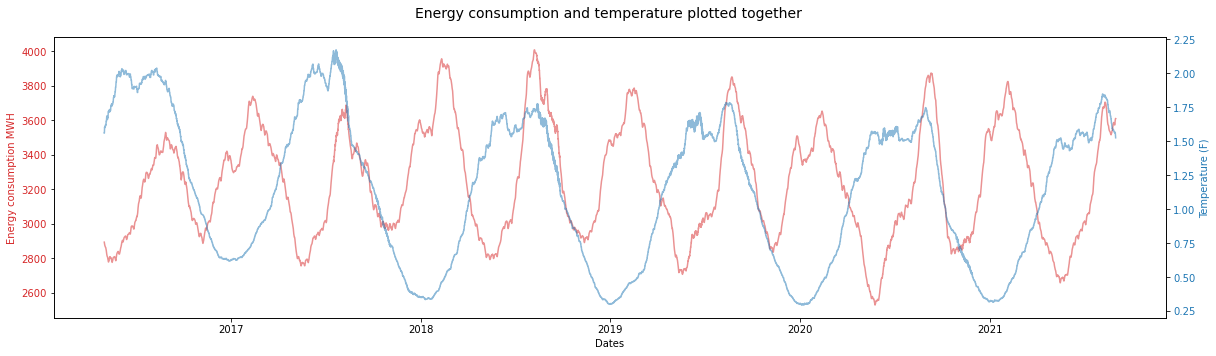

In [43]:
# Plotting the energy and weather data on the same graph as line plots
fig, ax1 = plt.subplots(figsize=(17,5))
rolling_num = 24*30 # smoothing the data a bit by taking the mean of last 'rolling_num' values 
#i.e. plotting the 30 day average energy consumption and temperature values 
color = 'tab:red'
ax1.set_xlabel('Dates')
ax1.set_ylabel('Energy consumption MWH', color = color)
ax1.plot(ec_concat['mW'].rolling(rolling_num).mean(), color = color, alpha = 0.5)        
ax1.tick_params(axis='y', labelcolor = color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature (F)', color = color)  # we already handled the x-label with ax1
ax2.plot(ec_concat['uv_index'].rolling(rolling_num).mean(), color = color, alpha = 0.5)   
ax2.tick_params(axis='y', labelcolor = color)

fig.suptitle('Energy consumption and temperature plotted together', fontsize = 14)
fig.tight_layout()
plt.show()

We can clearly see that they seem to have some level of correlation, with consumption going up when temp goes extreme.

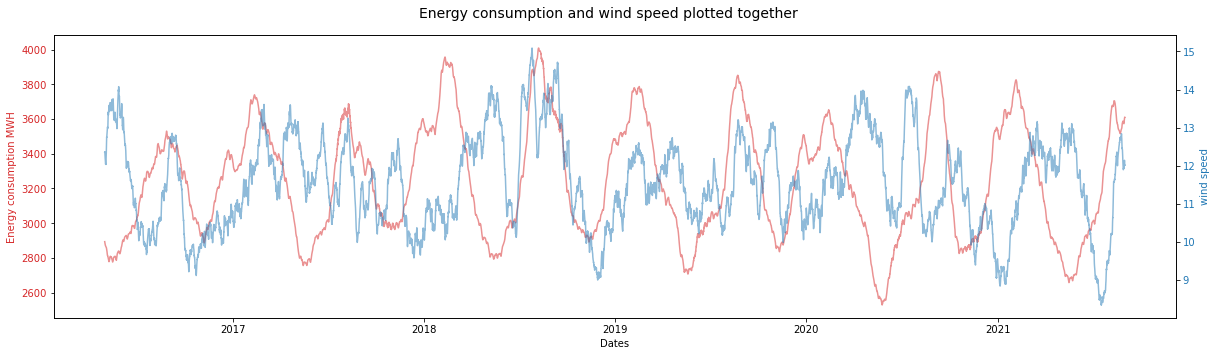

In [44]:
# Plotting the energy and weather data on the same graph as line plots
fig, ax1 = plt.subplots(figsize=(17, 5))
rolling_num = 24*30 # smoothing the data a bit by taking the mean of last 'rolling_num' values 
#i.e. plotting the 30 day average energy consumption and temperature values 
color = 'tab:red'
ax1.set_xlabel('Dates')
ax1.set_ylabel('Energy consumption MWH', color = color)
ax1.plot(ec_concat['mW'].rolling(rolling_num).mean(), color = color, alpha = 0.5)        
ax1.tick_params(axis='y', labelcolor = color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('wind speed', color = color)  # we already handled the x-label with ax1
ax2.plot(ec_concat['wind_speed(mph)'].rolling(rolling_num).mean(), color = color, alpha = 0.5)   
ax2.tick_params(axis='y', labelcolor = color)

fig.suptitle('Energy consumption and wind speed plotted together', fontsize = 14)
fig.tight_layout()
plt.show()

Less with wind speed.

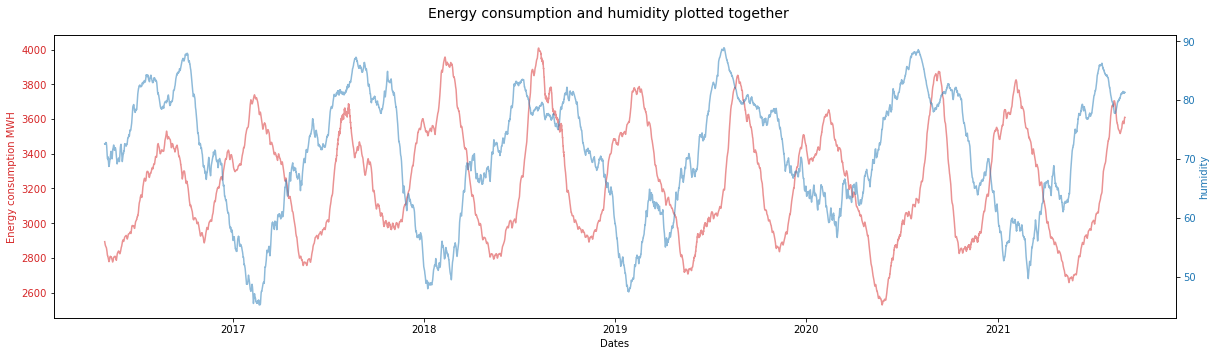

In [45]:
# Plotting the energy and weather data on the same graph as line plots
fig, ax1 = plt.subplots(figsize=(17, 5))
rolling_num = 24*30 # smoothing the data a bit by taking the mean of last 'rolling_num' values 
#i.e. plotting the 30 day average energy consumption and temperature values 
color = 'tab:red'
ax1.set_xlabel('Dates')
ax1.set_ylabel('Energy consumption MWH', color = color)
ax1.plot(ec_concat['mW'].rolling(rolling_num).mean(), color = color, alpha = 0.5)        
ax1.tick_params(axis='y', labelcolor = color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('humidity', color = color)  # we already handled the x-label with ax1
ax2.plot(ec_concat['humidity(%)'].rolling(rolling_num).mean(), color = color, alpha = 0.5)   
ax2.tick_params(axis='y', labelcolor = color)

fig.suptitle('Energy consumption and humidity plotted together', fontsize = 14)
fig.tight_layout()
plt.show()

Humidity is similar with temperature, as in summer it gets more humid and requires more air conditioning.

# 4. Export df

In [46]:
ec_concat.to_csv('./data/electricity_data.csv')